# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the case study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


## Importing data 

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the dataframe

In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Checking the number of rows and columns in the dataframe
leads.shape

(9240, 37)

In [5]:
leads.size

341880

In [6]:
# Checking the summary for the numeric columns 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data quality check

In [7]:
#checking for null values in dataset

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#check for duplicates

sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

We concluded that there are no duplicate values in the Prospect ID

In [9]:
#check for duplicates

sum(leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number also.

Conclusion:

Hence, it is concluded Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

## Cleaning the dataframe

In [10]:
# Converting all the values to lower case

leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
# Replacing 'Select' with NaN (Since it means no option is selected)

leads = leads.replace('select',np.nan)

In [12]:
# Checking if there are columns with one unique value since it won't affect our analysis

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
# Dropping unique valued columns

leads_1= leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [14]:
# Checking the percentage of missing values

round(100*(leads_1.isnull().sum()/len(leads_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# Removing all the columns that are no required and have 35% null values

leads_2 = leads_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
leads_2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [16]:
# Rechecking the percentage of missing values

round(100*(leads_2.isnull().sum()/len(leads_2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
leads_2['Specialization'] = leads_2['Specialization'].fillna('not provided') 
leads_2['What matters most to you in choosing a course'] = leads_2['What matters most to you in choosing a course'].fillna('not provided')
leads_2['Country'] = leads_2['Country'].fillna('not provided')
leads_2['What is your current occupation'] = leads_2['What is your current occupation'].fillna('not provided')
leads_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [18]:
# Rechecking the percentage of missing values

round(100*(leads_2.isnull().sum()/len(leads_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
leads_2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [20]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads_2['Country'] = leads_2.apply(lambda x:slots(x['Country']), axis = 1)
leads_2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [21]:
# Rechecking the percentage of missing values

round(100*(leads_2.isnull().sum()/len(leads_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [22]:
# Checking the percent of lose if the null values are removed

round(100*(sum(leads_2.isnull().sum(axis=1) > 1)/leads_2.shape[0]),2)

1.48

In [23]:
leads_3 = leads_2[leads_2.isnull().sum(axis=1) <1]

In [24]:
# Rechecking the percentage of missing values

round(100*(leads_3.isnull().sum()/len(leads_3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

# EDA

## Categorical Attributes Analysis

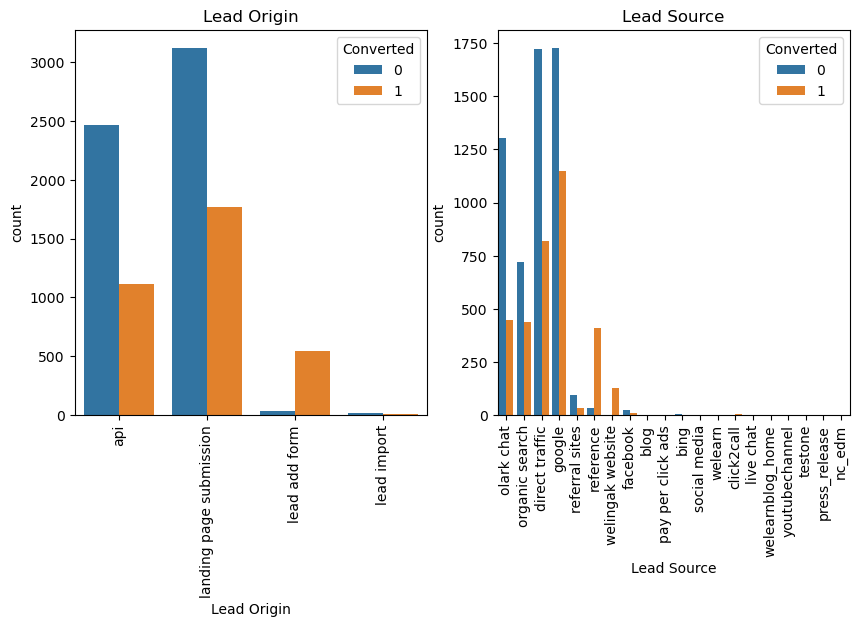

In [25]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Concusion:


1. We can see maximum number of leads from are google and direct traffic.
2. Olark chat, organic search show so many leads who are not getting converted, so we need to focus into those.
3. API and Landing Page Submission bring higher number of leads as well as conversion.
4. Lead Add Form has a very high conversion rate but count of leads are not very high.
5. Lead Import and Quick Add Form get very few leads.
6. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

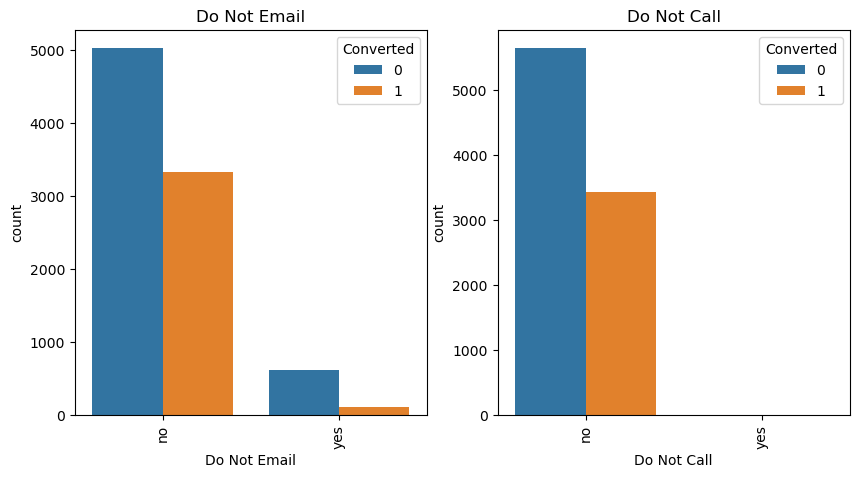

In [26]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

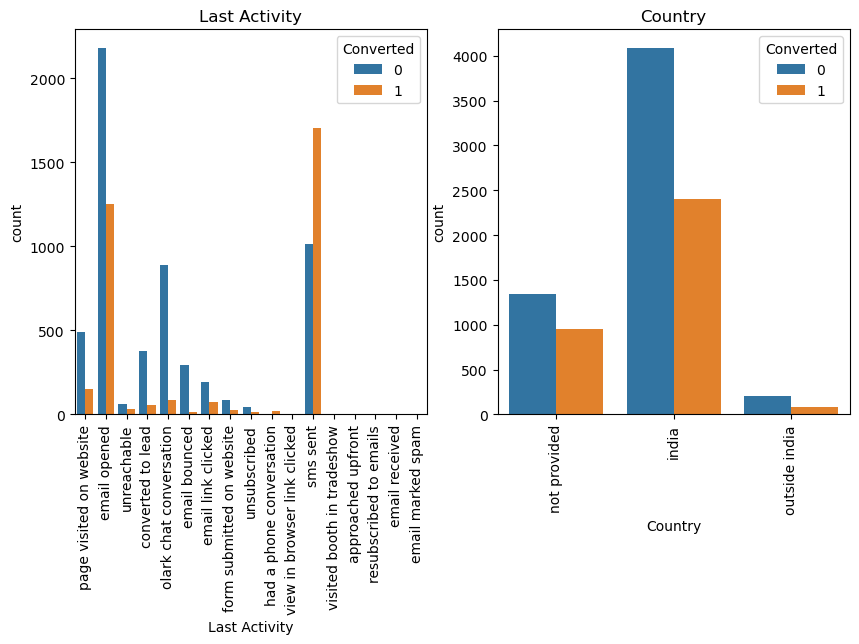

In [27]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


Conclusion:

Leads with sms sent and had a phone conversation shows most conversion.

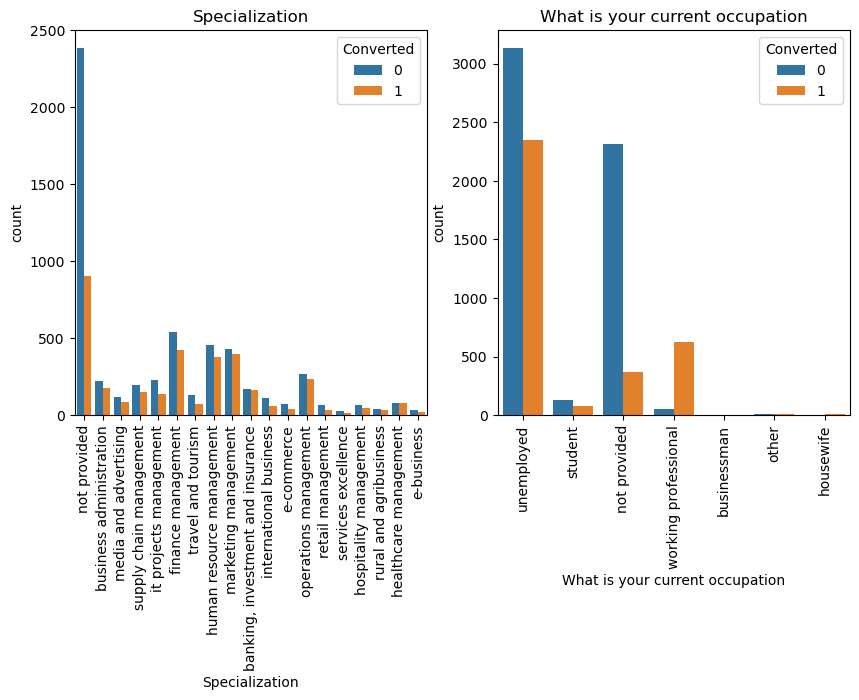

In [28]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

Conclusion:

1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in terms of Absolute numbers.

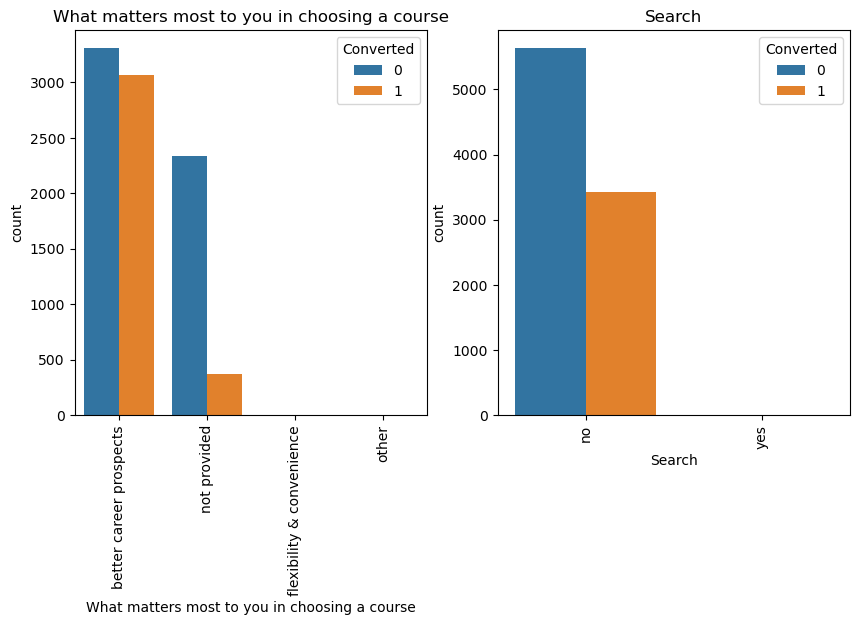

In [29]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

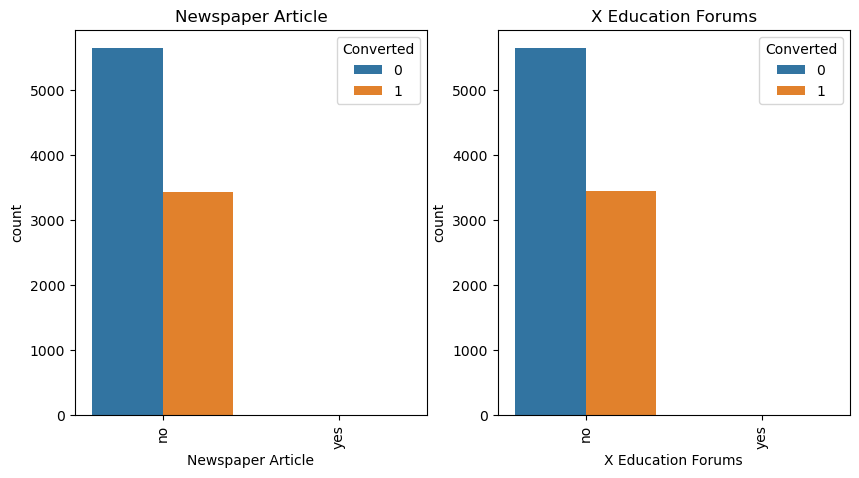

In [30]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

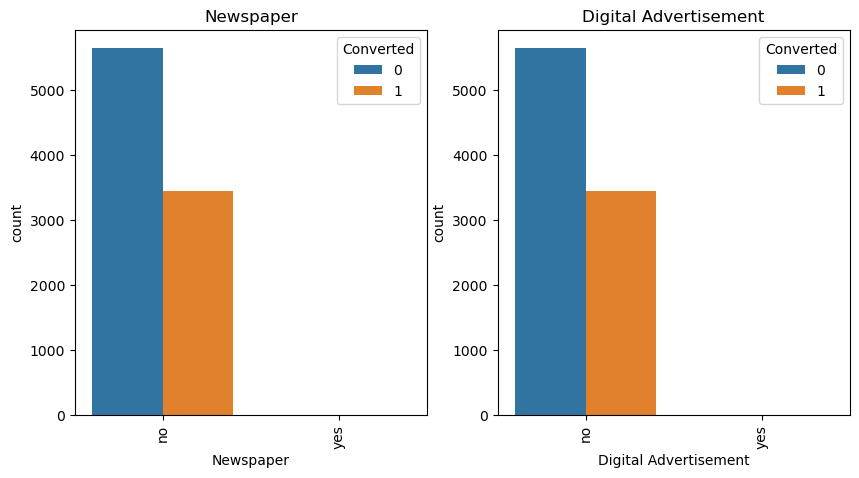

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

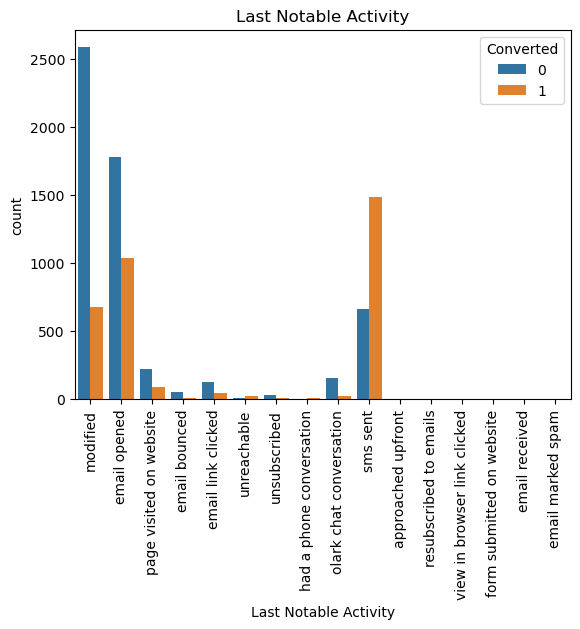

In [32]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Conclusion:

Those leads to whom sms was sent shows most of the conversion.

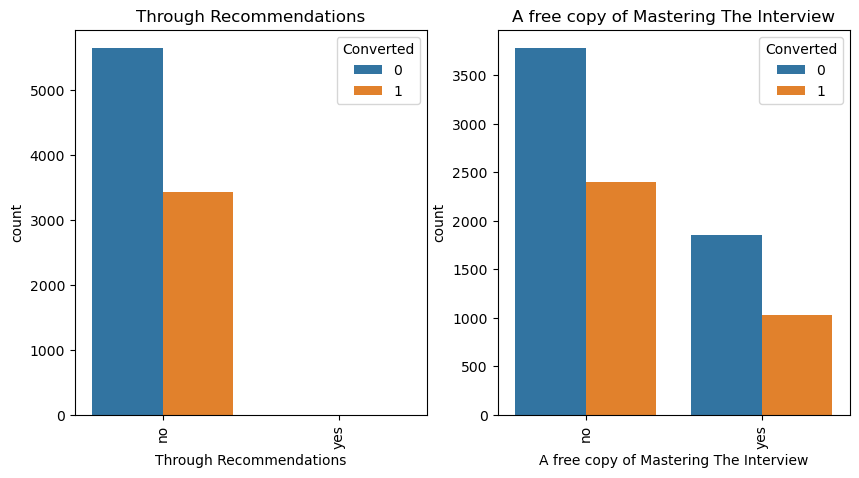

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_3).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

## Numerical variable analysis

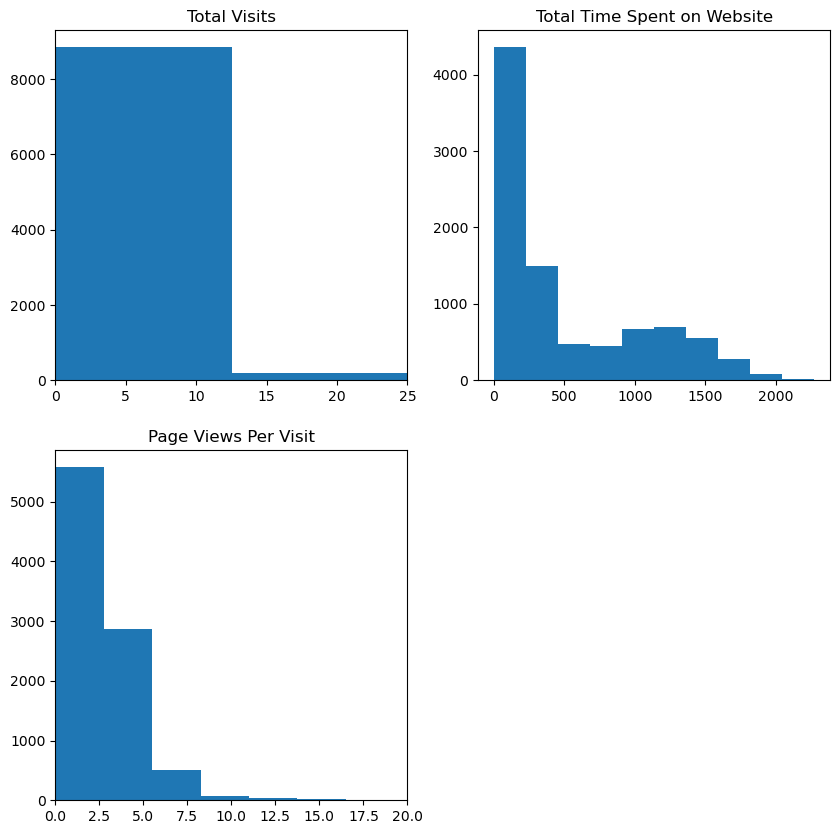

In [34]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads_3['TotalVisits'], bins = 20)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads_3['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads_3['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

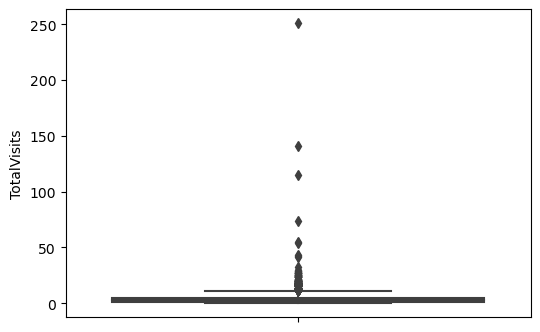

In [36]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_3['TotalVisits'])
plt.show()


We can see presence of outliers here.

In [37]:
#checking percentile values for "Total Visits"

leads_3['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

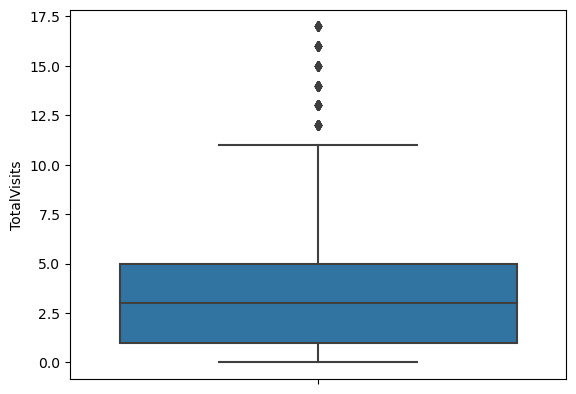

In [38]:
#Outlier Treatment: Removing top & bottom 1% of the Column Outlier values

Q3 = leads_3.TotalVisits.quantile(0.99)
leads_3 = leads_3[(leads_3.TotalVisits <= Q3)]
Q1 = leads_3.TotalVisits.quantile(0.01)
leads_3 = leads_3[(leads_3.TotalVisits >= Q1)]
sns.boxplot(y=leads_3['TotalVisits'])
plt.show()

In [39]:
leads_3.shape

(8991, 22)

## Checking for numerical column

In [40]:
#checking percentiles for "Total Time Spent on Website"

leads_3['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

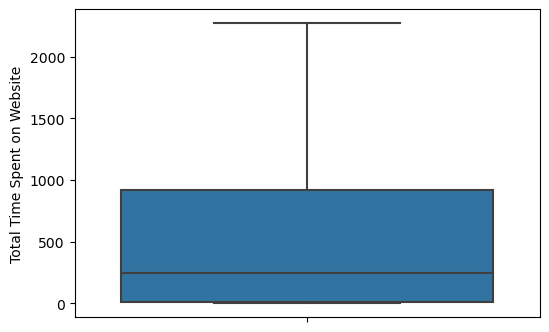

In [41]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_3['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above column.

In [42]:
#checking spread of "Page Views Per Visit"

leads_3['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

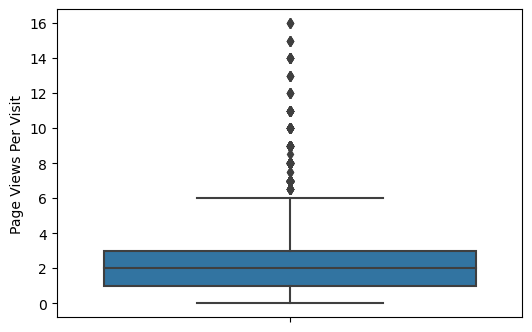

In [43]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_3['Page Views Per Visit'])
plt.show()


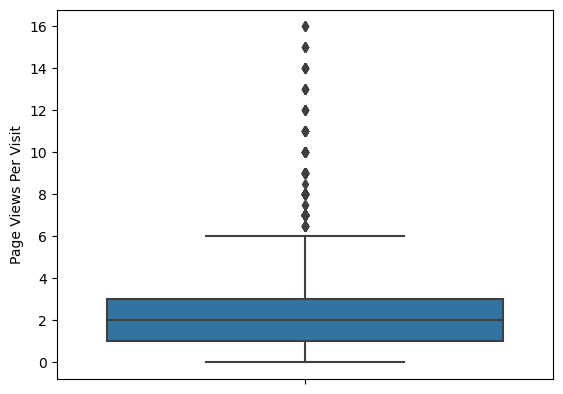

In [44]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads_3['Page Views Per Visit'].quantile(0.99)
leads = leads_3[leads_3['Page Views Per Visit'] <= Q3]
Q1 = leads_3['Page Views Per Visit'].quantile(0.01)
leads = leads_3[leads_3['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_3['Page Views Per Visit'])
plt.show()

In [45]:
leads_3.shape

(8991, 22)

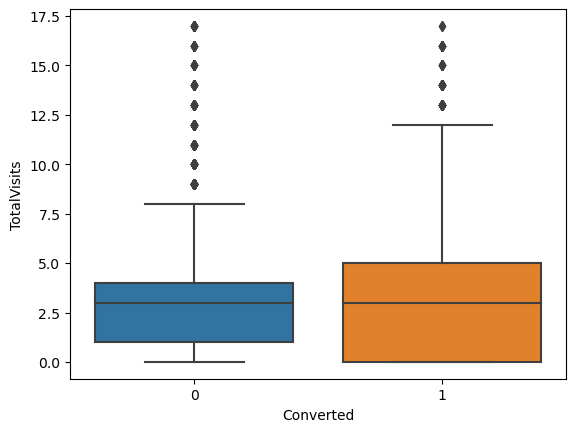

In [46]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_3)
plt.show()

Concusions:

1. Median for converted and not converted leads are the close.
2. We can't say anything on the basis of Total Visits.

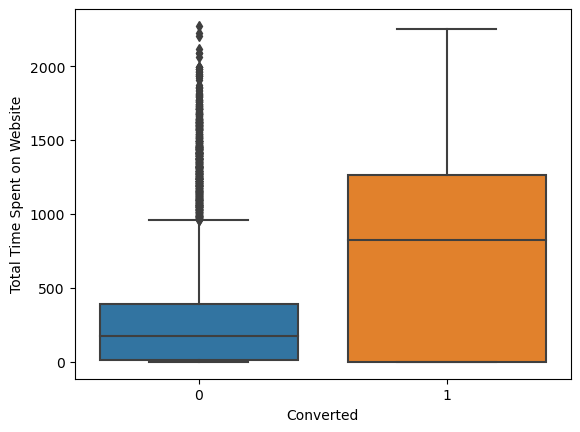

In [47]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads_3.Converted, y=leads_3['Total Time Spent on Website'])
plt.show()

Concusion:

1. Website should be made more engaging to make leads spend more time.
2. Leads spending more time on the website are more likely to be converted.

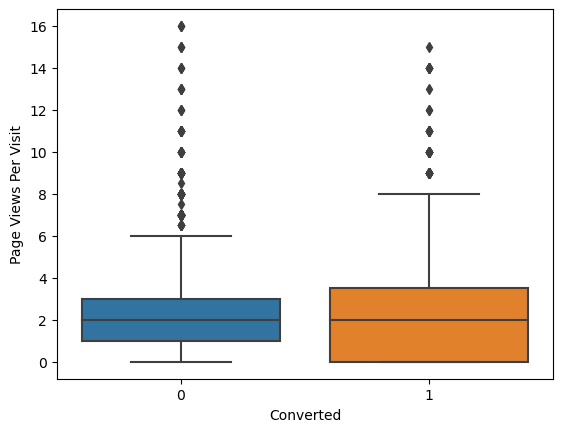

In [48]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads_3.Converted,y=leads_3['Page Views Per Visit'])
plt.show()

Conclusion:

1. Median for converted and unconverted leads is same.
2. We can't say specifically for lead conversion from Page Views Per Visit.

In [49]:
#checking missing values in leftover columns/

round(100*(leads_3.isnull().sum()/len(leads_3.index)),2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

There are no missing values in the columns to be analyzed further.

## Creating dummy variable

In [50]:
leads_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8991 non-null   object 
 1   Lead Origin                                    8991 non-null   object 
 2   Lead Source                                    8991 non-null   object 
 3   Do Not Email                                   8991 non-null   object 
 4   Do Not Call                                    8991 non-null   object 
 5   Converted                                      8991 non-null   int64  
 6   TotalVisits                                    8991 non-null   float64
 7   Total Time Spent on Website                    8991 non-null   int64  
 8   Page Views Per Visit                           8991 non-null   float64
 9   Last Activity                                  8991 non-n

In [51]:
leads_3.loc[:, leads_3.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
# Creating dummy variables using the 'get_dummies'

dummy = pd.get_dummies(leads_3[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe

leads_3_dum = pd.concat([leads_3, dummy], axis=1)
leads_3_dum

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.50,email opened,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,...,False,False,False,False,False,False,False,False,False,False
9236,82a7005b-7196-4d56-95ce-a79f937a158d,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,...,False,False,False,False,False,False,True,False,False,False
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,...,False,False,False,False,False,False,True,False,False,False
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,...,False,False,False,False,False,False,True,False,False,False


In [53]:
leads_3_dum = leads_3_dum.drop(columns=['Prospect ID','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
leads_3_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [54]:
# Import the required library
from sklearn.model_selection import train_test_split

In [55]:
X = leads_3_dum.drop(columns=['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [56]:
# Putting the target variable in y
y = leads_3_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Splitting the data into Train & Test Dataset

In [57]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [58]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3523,2.0,130,1.0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3267,0.0,0,0.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5653,2.0,918,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5072,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3704,4.0,98,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
X_train.shape

(6293, 80)

In [60]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6293.000000,6293.000000,6293.000000
mean,3.201017,480.214842,2.325562
std,2.977899,544.740258,2.031287
min,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000
50%,3.000000,241.000000,2.000000
75%,5.000000,924.000000,3.000000
max,17.000000,2272.000000,16.000000


## Rescaling the Features

In [61]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3523,0.117647,0.057218,0.0625,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3267,0.000000,0.000000,0.0000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5653,0.117647,0.404049,0.1250,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5072,0.000000,0.000000,0.0000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3704,0.235294,0.043134,0.2500,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [63]:
# Import RFE
from sklearn.feature_selection import RFE

In [64]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [65]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 27),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 29),
 ('Specialization_e-business', False, 23),
 ('Specialization_e-commerce', False, 34),
 ('Specialization_finance management', False, 26),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 54),
 ('Specialization_human resource management', False, 28),
 ('Specialization_international business', False, 32),
 ('Specialization_it projects management', False, 31),
 ('Specialization_marketing management', False, 24),
 ('Specialization_media and advertising', False, 50),
 ('Specialization_operations management', False, 35),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 30),
 ('Specialization_servi

In [66]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [67]:
# Selecting columns selected by RFE
X_train = X_train[col]

# Building model using statsmodel

In [68]:
# Importing statsmodels
import statsmodels.api as sm

In [74]:
X_train = X_train.astype(int)

In [75]:
X_train_sm = sm.add_constant(np.asarray(X_train))
logm1 = sm.GLM(np.asarray(y_train), X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3080.9
Date:                Tue, 24 Sep 2024   Deviance:                       6161.7
Time:                        21:14:29   Pearson chi2:                 6.35e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2931
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6652      0.065     10.226      0.000       0.538       0.793
x1            -1.0497      1.055     -0.995      0.320      -3.118       1.019
x2           -22.8842   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
x3           -19.6281   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
x4             2.9076      0.245     11.860      0.000       2.427       3.388
x5            -0.3471      0.070     -4.930      0.000      -0.485      -0.209
x6             2.3985      1.042      2.302      0.021       0.356       4.441
x7            -1.7571      0.162    -10.820      0.000      -2.075      -1.439
x8            -1.3822      0.180     -7.697      0.000      -1.734      -1.030
x9            22.6959   1.73e+04      0.001      0.999   -3.39e+04     3.4e+04
x10            2.8573      0.178     16.068      0.000       2.509       3.206
x11           -2.0364      0.245     -8.326      0.000      -2.516      -1.557
x12           -1.3773      0.079    -17.338      0.000      -1.533      -1.222
x13           -1.8805      0.088    -21.445      0.000      -2.052      -1.709
x14           -1.2015      0.334     -3.599      0.000      -1.856      -0.547
x15           -1.6609      0.181     -9.190      0.000      -2.015      -1.307
==============================================================================
"""

In [76]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_olark chat conversation,1.68
12,Last Notable Activity_modified,1.61
3,Lead Origin_lead add form,1.47
4,Lead Source_direct traffic,1.35
5,Lead Source_welingak website,1.34
13,Last Notable Activity_olark chat conversation,1.32
11,Last Notable Activity_email opened,1.18
6,Do Not Email_yes,1.13
9,What is your current occupation_working profes...,1.12
14,Last Notable Activity_page visited on website,1.04


In [78]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

## Model 2

In [79]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3085.3
Date:                Tue, 24 Sep 2024   Deviance:                       6170.5
Time:                        21:14:45   Pearson chi2:                 6.37e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6649      0.065     10.224      0.000       0.537       0.792
TotalVisits                                             -1.0513      1.055     -0.996      0.319      -3.120       1.017
Total Time Spent on Website                            -21.8846   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Page Views Per Visit                                   -18.6292   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
Lead Origin_lead add form                                2.9301      0.245     11.968      0.000       2.450       3.410
Lead Source_direct traffic                              -0.3464      0.070     -4.925      0.000      -0.484      -0.209
Lead Source_welingak website                             2.3737      1.042      2.278      0.023       0.332       4.416
Do Not Email_yes                                        -1.7587      0.162    -10.829      0.000      -2.077      -1.440
Last Activity_olark chat conversation                   -1.3855      0.180     -7.716      0.000      -1.737      -1.034
What is your current occupation_working professional     2.8544      0.178     16.051      0.000       2.506       3.203
Last Notable Activity_email link clicked                -2.0270      0.243     -8.338      0.000      -2.504      -1.551
Last Notable Activity_email opened                      -1.3736      0.079    -17.300      0.000      -1.529      -1.218
Last Notable Activity_modified                          -1.8770      0.088    -21.420      0.000      -2.049      -1.705
Last Notable Activity_olark chat conversation           -1.1984      0.334     -3.589      0.000      -1.853      -0.544
Last Notable Activity_page visited on website           -1.6610      0.181     -9.189      0.000      -2.015      -1.307
========================================================================================================================
"""

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_olark chat conversation,1.68
11,Last Notable Activity_modified,1.61
3,Lead Origin_lead add form,1.46
4,Lead Source_direct traffic,1.35
5,Lead Source_welingak website,1.34
12,Last Notable Activity_olark chat conversation,1.32
10,Last Notable Activity_email opened,1.18
6,Do Not Email_yes,1.13
8,What is your current occupation_working profes...,1.12
13,Last Notable Activity_page visited on website,1.04


In [81]:
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

## Model 3

In [82]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3090.3
Date:                Tue, 24 Sep 2024   Deviance:                       6180.6
Time:                        21:14:47   Pearson chi2:                 6.62e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6643      0.065     10.221      0.000       0.537       0.792
TotalVisits                                             -1.0530      1.055     -0.998      0.318      -3.121       1.015
Total Time Spent on Website                            -21.8836   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Page Views Per Visit                                   -18.6370   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
Lead Origin_lead add form                                3.2969      0.236     13.993      0.000       2.835       3.759
Lead Source_direct traffic                              -0.3467      0.070     -4.931      0.000      -0.485      -0.209
Do Not Email_yes                                        -1.7439      0.161    -10.830      0.000      -2.059      -1.428
Last Activity_olark chat conversation                   -1.3884      0.180     -7.726      0.000      -1.741      -1.036
What is your current occupation_working professional     2.8484      0.178     16.008      0.000       2.500       3.197
Last Notable Activity_email link clicked                -2.0283      0.243     -8.337      0.000      -2.505      -1.551
Last Notable Activity_email opened                      -1.3734      0.079    -17.302      0.000      -1.529      -1.218
Last Notable Activity_modified                          -1.8756      0.088    -21.427      0.000      -2.047      -1.704
Last Notable Activity_olark chat conversation           -1.2003      0.335     -3.586      0.000      -1.856      -0.544
Last Notable Activity_page visited on website           -1.6593      0.181     -9.191      0.000      -2.013      -1.305
========================================================================================================================
"""

## Creating Prediction

In [83]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.229470
3267    0.981315
5653    0.258112
5072    0.329800
3704    0.329800
1790    0.229470
2482    0.229470
1694    0.229470
8768    0.329800
9225    0.035505
dtype: float64

In [84]:

# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22946981, 0.98131494, 0.25811168, 0.32980016, 0.32980016,
       0.22946981, 0.22946981, 0.22946981, 0.32980016, 0.03550535])

In [85]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.229470
1,1,0.981315
2,1,0.258112
3,0,0.329800
4,0,0.329800


In [86]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.229470,0
1,1,0.981315,1
2,1,0.258112,0
3,0,0.329800,0
4,0,0.329800,0


## Model Evaluation

In [87]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [88]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3453,  462],
       [ 964, 1414]], dtype=int64)

In [89]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7733990147783252

In [90]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [91]:
# Calculating the sensitivity
TP/(TP+FN)

0.5946173254835997

In [92]:
# Calculating the specificity
TN/(TN+FP)

0.881992337164751

# ROC Curve

In [93]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

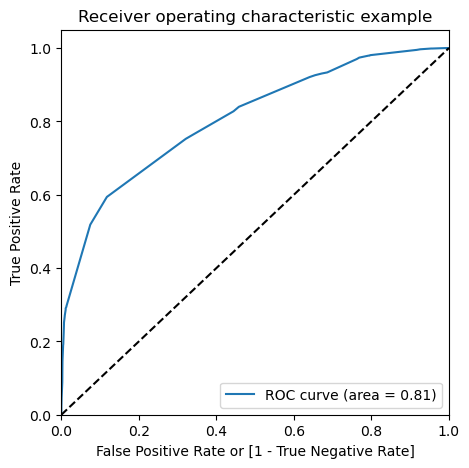

In [95]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [96]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.229470,0,1,1,1,0,0,0,0,0,0,0
1,1,0.981315,1,1,1,1,1,1,1,1,1,1,1
2,1,0.258112,0,1,1,1,0,0,0,0,0,0,0
3,0,0.329800,0,1,1,1,1,0,0,0,0,0,0
4,0,0.329800,0,1,1,1,1,0,0,0,0,0,0


In [97]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.498173,0.979394,0.205875
0.2,0.2,0.555697,0.930614,0.327969
0.3,0.3,0.706817,0.752313,0.679183
0.4,0.4,0.773081,0.595038,0.881226
0.5,0.5,0.773399,0.594617,0.881992
0.6,0.6,0.771333,0.516821,0.925926
0.7,0.7,0.725727,0.295627,0.986973
0.8,0.8,0.724774,0.289739,0.989017
0.9,0.9,0.691880,0.192599,0.995147


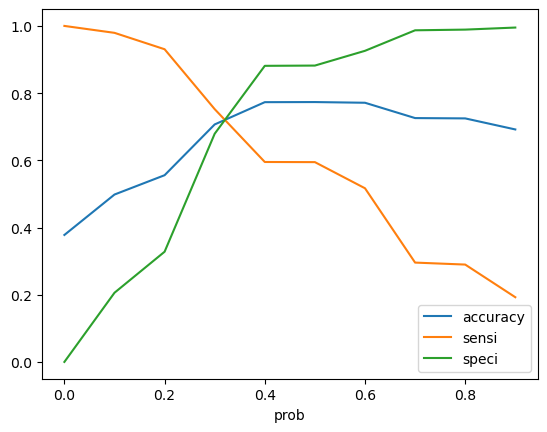

In [98]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229470,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.981315,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.258112,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.329800,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.329800,0,1,1,1,1,0,0,0,0,0,0,0


In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7730812013348165

In [101]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3450,  465],
       [ 963, 1415]], dtype=int64)

In [102]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.5950378469301935

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.8812260536398467

## Prediction on Test set

In [113]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [114]:
# Substituting all the columns in the final train model
col = X_train.columns

In [115]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_direct traffic,Do Not Email_yes,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3308,1.0,0.006920,0.000022,0.007812,False,False,False,False,False,False,True,False,False,False
4421,1.0,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False
8855,1.0,0.003460,0.000241,0.003906,False,True,False,False,False,False,False,True,False,False
5302,1.0,0.000000,0.000000,0.000000,False,False,False,True,False,False,False,True,False,False
2169,1.0,0.034602,0.000172,0.005586,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.003460,0.000096,0.003906,False,True,False,False,False,False,False,True,False,False
7836,1.0,0.034602,0.000100,0.039062,False,False,False,False,True,True,False,False,False,False
8378,1.0,0.034602,0.000079,0.013008,False,False,True,False,False,False,False,False,False,True
1263,1.0,0.006920,0.000166,0.007812,False,True,False,False,True,False,False,False,False,False


In [119]:
# Ensure X_test is numeric and add constant
X_test_sm = sm.add_constant(np.asarray(X_test.astype(int)))
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.329800
1,1,0.660219
2,1,0.173930
3,0,0.069154
4,0,0.258112


In [120]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.329800,0
1,1,0.660219,1
2,1,0.173930,0
3,0,0.069154,0
4,0,0.258112,0
...,...,...,...
2693,1,0.173930,0
2694,1,0.815233,1
2695,0,0.060713,0
2696,1,0.959533,1


In [121]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.779466271312083

In [122]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1482,  195],
       [ 400,  621]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Calculating the sensitivity
TP/(TP+FN)

0.6082272282076395

In [125]:
# Calculating the sensitivity
TP/(TP+FN)

0.6082272282076395

## Precision-Recall

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3453,  462],
       [ 964, 1414]], dtype=int64)

In [127]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.753731343283582

In [128]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5946173254835997

## Precision and recall tradeoff

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

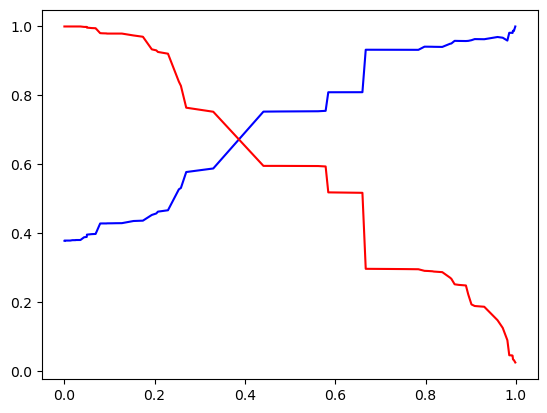

In [131]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229470,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.981315,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.258112,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.329800,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.329800,0,1,1,1,1,0,0,0,0,0,0,0


In [133]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7730812013348165

In [134]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3450,  465],
       [ 963, 1415]], dtype=int64)

In [135]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [136]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7526595744680851

In [137]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5950378469301935

## Prediction on Test set

In [138]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.329800
1,1,0.660219
2,1,0.173930
3,0,0.069154
4,0,0.258112


In [139]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.329800,0
1,1,0.660219,1
2,1,0.173930,0
3,0,0.069154,0
4,0,0.258112,0
...,...,...,...
2693,1,0.173930,0
2694,1,0.815233,1
2695,0,0.060713,0
2696,1,0.959533,1


In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.779466271312083

In [141]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1482,  195],
       [ 400,  621]], dtype=int64)

In [142]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [143]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7610294117647058

In [144]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6082272282076395

Accuracy, Sensitivity and Specificity values of test set are around 80%, 72% and 76% which are approximately closer to 
the respective values calculated using trained set.
  
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
around 80%.

Hence overall this model seems to be good.  

# Final Report with conclusion:

The variables that mattered the most in the potential buyers as per this model are as folows:

1. Total number of visits on the website.
2. Total time spent on the website.
3. When the last activity was:
       a. SMS
       b. Olark chat conversation
4. When the current occupation is as a working professional.
5. When the lead search was Google, Direct traffic, welingak website.

Keeping these parameters in mind, X Educaion can grow as they have a very high chances to get almost all potential buyers to change their mind and buy their cources hence increasing the conversion ratio.

